# **Regressão Linear Simples**

A Regressão Linear Simples modela a magnitude de uma variável e aquela de uma segunda. Mas, e a correlação? A correlação é outra forma de medir como duas variáveis se relacionam. A diferença é que enquanto a correlação mede a força de uma associação entre duas variáveis, a regressão quantifica a natureza do relacionamento.

### A Equação de Regressão

A Regressão Linear Simples estima xatamente o quanto Y mudará quando X mudar em uma certa quantidade. Com a regressão estamos tentando prever a variável Y a partir de X usando um relacionamento linear.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/731c6bb6ae3b5f933db68a82e7377e63910a887c"></img>

O símbolo α é conhecido como o *intercepto* (ou constante), e o símbolo β, como o *declive* para X. A variável Y é conhecida como resposta ou variável dependente, já que depende de X. A variável X é conhecida como preditora ou variável independente. A seguir está um exemplo da linha de regressão de um modelo.

<img src='https://upload.wikimedia.org/wikipedia/commons/9/9e/Reta_Regressora.jpg' height="300" width="400"></img>

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

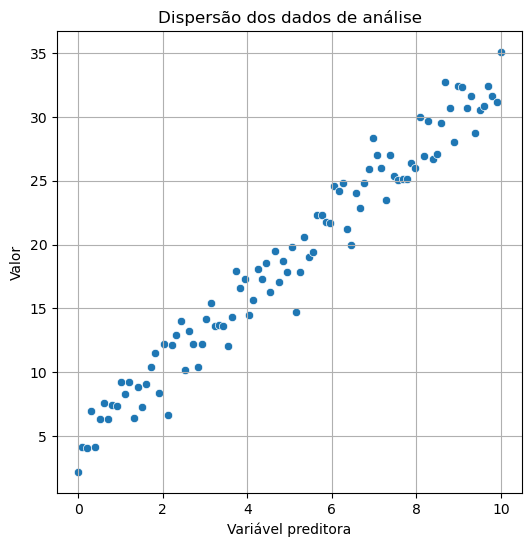

In [2]:
# produzindo dados aleatórios para regressão
m = np.random.randint(1,4)  # inclinação
b = np.random.randint(3,10)  # interceptação

# Gerar dados x
X = np.linspace(0, 10, 100)

ruido = np.random.normal(0, 1.5, size=len(X)) # Gerar dados y sem ruído
Y = (m * X + b) + ruido

plt.figure(figsize=(6,6))
sns.scatterplot(x=X, y=Y)
plt.title('Dispersão dos dados de análise')
plt.xlabel('Variável preditora')
plt.ylabel('Valor')
plt.grid()
plt.show()

### Valores Ajustados e Resíduos

Em geral, os dados não ficam exatamente em uma linha, então a equação de regressão deveria incluir um termo de erro:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4681e28c4c164084adb063912d49bc12f6905d5c"></img>

Calculamos os residuos *ei* subtaindo os valores previstos dos dados originais.

<img src='https://wikiciencias.casadasciencias.org/wiki/images/9/91/Min_quad.png'></img>

### Mínimos Quadrados

Para entender como um modelo se ajusta aos dados, temos que, na prática fazemos a estimativa que minimiza a soma dos valores quadrados do resíduo, também chamados de *residual sum of squares (RSS)*:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/15525c58b414d014b7d44d802826ca39fa54c7e1'></img>

As estimativas α e β são os valores que minimizam RSS


In [3]:
def regressao_linear(X, Y):

    X = np.column_stack((np.ones(len(X)), X)) # Adicionar uma coluna de uns para representar o termo constante (intercepto)

    coefs = np.linalg.inv(X.T @ X) @ X.T @ Y # Calcular os coeficientes usando a fórmula dos mínimos quadrados

    lr = np.dot(X, coefs)
    
    return coefs, lr


def calcular_RSS(Y, Y_pred) -> float:

    RSS = sum((Y - Y_pred)**2)
    return RSS

Intercepto: 4.59
Coeficiente: 2.86
Residual Sum of Squares (RSS): 265.39


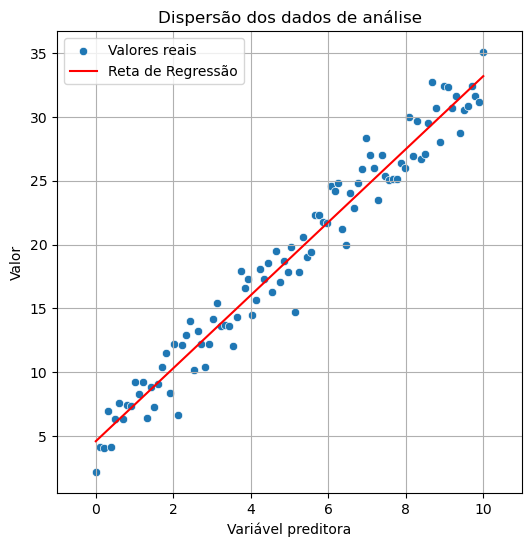

In [4]:
coefs, y_pred = regressao_linear(X, Y)
RSS = calcular_RSS(Y, y_pred)

print(f'Intercepto: {coefs[0]:.2f}')
print(f'Coeficiente: {coefs[-1]:.2f}')
print(f'Residual Sum of Squares (RSS): {RSS:.2f}')

plt.figure(figsize=(6,6))
sns.scatterplot(x=X, y=Y, label='Valores reais')
plt.plot(X, y_pred, label='Reta de Regressão', color='red')
plt.title('Dispersão dos dados de análise')
plt.xlabel('Variável preditora')
plt.ylabel('Valor')
plt.xlim(0-1,max(X)+1)
plt.legend()
plt.grid()
plt.show()

Um modelo d regressão acomoda bem s dados de modo que as mudanças de X levem a mudanças em Y. No entanto, a equação de regressão não prova a direção da causa. É o nosso conhecimento sobre o processo e o business, que leva à conclusão de quem impacta quem.

# **Regressão Linear Múltipla**

Quando existem múltiplas varipaveis preditoras, a equação simplesmente s estende para acomodá-las.

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/b7ade53ead459e6683f434982ee6811e028eda7f'></img>

Em vez de uma linha reta, agora temos um modelo linear e o relacionamento entre cada coeficiente e sua variável é linear. Todos os outros conceitos em egressão linear simples se estendem para a configuação da regressão linear múltipla.

In [5]:
# previsão de temperatura
raw_data = pd.read_csv('https://raw.githubusercontent.com/hanubugg/linear-regression/master/data/air_quality.csv')
raw_data.head()

,Time of Day,Average CO Concentration,Average Tin Oxide,Average Non Metanic Hydrocarbon Concentration,Average Benzene Concentration,Average Titania,Average NOx Concentration,Average Tungsten Oxide (NOx Concentrated),Average NO2 Concentation,Average Tungsten Oxide (NO2 Concentrated),Average Indium Oxide,Temperature (ºC),Relative Humidity (%),Absolute Humidity
0,1800.0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,1900.0,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2000.0,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2100.0,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2200.0,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Avaliando o modelo

A métrica de desempenho mais importante da perspectiva da ciência d dados é a *Root Mean Square Error (RMSE)*, que é a raiz quadrada do erro quadrático médio nos valores previstos.

<img src='https://community.qlik.com/legacyfs/online/128958_2016-06-23%2013_45_36-Root%20Mean%20Squared%20Error%20_%20Kaggle.png'></img>

Mede a precisão geral do modelo, e é uma base para a comparação com outros modelos. Outra métrica útil é o *coeficiente de determinação*, também chamado de R-quadrado ou R2. O R-quadrado varia de 0 a 1 e mede a proporção de variação nos dados que é contabilizada pelo modelo. É útil principalmente em usos explicativos da regressão, no qual se quer avaliar o quão bem o medelo acomoda os dados. A fórmula de R2 é:

<img src='https://www.redalyc.org/journal/3939/393950135006/1982-2170-bcg-23-01-00087-e2.jpg'></img>

In [6]:
def calcular_RMSE(Y, Yp):

    n = Y.shape[0]
    RMSE = np.sqrt(np.sum((Y-Yp)**2)/n)

    return RMSE

def calcular_R2(Y, Yp):

    y_bar = np.mean(Y)
    SQR = np.sum((Y - Yp)**2)
    SQT = np.sum((Y - y_bar)**2)

    R2 = 1 - (SQR/SQT)
    return R2

In [7]:
X = np.array(raw_data.drop(["Temperature (ºC)"], axis=1))
Y = np.array(raw_data[["Temperature (ºC)"]])

coefs, y_pred = regressao_linear(X, Y)

rmse = calcular_RMSE(Y, y_pred)
r2 = calcular_R2(Y, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R-quadrado: {r2:.2f}')

RMSE: 3.09
R-quadrado: 0.99
